In [1]:
import random

import pandas as pd
import os
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


### Loading data


In [2]:
root_dir = os.path.abspath(os.curdir)  # Doesn't work as intended. Needs fix below.
root_dir = root_dir[:-9]
results_dir = root_dir + "/results/"
# file_name = "belief_distributions_before_after.csv"
# file_name = "belief_distr_{'NormalUser': 1.0, 'Disinformer': 0.0}.csv"    # tiny experiment to see whether roughly makes sense?
file_name = "belief_distr_{'NormalUser': 0.99, 'Disinformer': 0.01}.csv"  # Actual experiment condition
# file_name = "belief_distr_{'NormalUser': 0.98, 'Disinformer': 0.02}.csv"
# file_name = "belief_distr_{'NormalUser': 0.95, 'Disinformer': 0.05}.csv"

file_dir = results_dir + file_name

data = pd.read_csv(file_dir)


In [3]:
data.head(5)


,Unnamed: 0,Replication,"((0.0, <SelectAgentsBy.RANDOM: 0>), True)","((0.0, <SelectAgentsBy.RANDOM: 0>), False)","((0.1, <SelectAgentsBy.RANDOM: 0>), True)","((0.1, <SelectAgentsBy.RANDOM: 0>), False)","((0.25, <SelectAgentsBy.RANDOM: 0>), True)","((0.25, <SelectAgentsBy.RANDOM: 0>), False)"
0,0,0,"([1, 94, 61, 21, 29, 10, 40, 43, 51, 92, 69, 3...","([64, 94, 66, 82, 88, 79, 64, 69, 39, 28, 76, ...","([77, 1, 61, 5, 77, 46, 4, 60, 72, 50, 45, 51,...","([23, 76, 62, 33, 54, 90, 10, 76, 91, 46, 88, ...","([66, 35, 54, 35, 45, 47, 41, 27, 83, 100, 7, ...","([4, 30, 23, 33, 45, 48, 33, 43, 95, 98, 14, 2..."
1,1,1,"([29, 47, 83, 47, 5, 55, 50, 43, 55, 42, 6, 71...","([86, 42, 80, 28, 98, 13, 2, 55, 1, 41, 75, 49...","([2, 38, 90, 6, 20, 77, 1, 92, 79, 20, 63, 39,...","([90, 76, 54, 74, 23, 40, 77, 69, 36, 81, 65, ...","([11, 5, 62, 11, 6, 92, 9, 15, 44, 47, 39, 10,...","([78, 44, 21, 31, 33, 17, 69, 45, 45, 97, 92, ..."
2,2,2,"([31, 10, 31, 81, 84, 21, 52, 59, 8, 64, 84, 5...","([55, 99, 15, 84, 63, 78, 79, 93, 96, 1, 82, 3...","([24, 60, 42, 31, 92, 46, 36, 41, 45, 50, 89, ...","([19, 14, 98, 84, 51, 71, 35, 93, 48, 64, 63, ...","([7, 36, 30, 59, 36, 0, 30, 73, 14, 4, 99, 95,...","([45, 4, 47, 5, 64, 18, 23, 87, 12, 26, 1, 25,..."
3,3,3,"([52, 17, 84, 35, 88, 84, 89, 96, 7, 83, 20, 6...","([21, 91, 68, 31, 39, 0, 38, 60, 50, 64, 77, 8...","([45, 2, 13, 36, 31, 81, 19, 90, 55, 80, 44, 9...","([54, 32, 57, 95, 20, 21, 57, 10, 97, 10, 3, 2...","([64, 48, 36, 41, 82, 89, 56, 50, 19, 99, 15, ...","([37, 50, 17, 91, 21, 76, 6, 64, 69, 60, 4, 15..."
4,4,4,"([92, 23, 32, 44, 93, 68, 98, 42, 29, 95, 61, ...","([9, 92, 36, 88, 45, 22, 0, 18, 38, 13, 57, 5,...","([42, 35, 15, 71, 2, 19, 93, 23, 30, 85, 88, 8...","([23, 35, 59, 7, 76, 31, 5, 100, 80, 8, 3, 20,...","([90, 53, 50, 48, 25, 61, 48, 75, 61, 80, 73, ...","([87, 11, 70, 83, 72, 40, 67, 49, 75, 39, 8, 7..."


### Reshaping data

In [4]:
data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
data.drop(["a", "Replication"], axis=1, inplace=True)
data.head(5)

,"((0.0, <SelectAgentsBy.RANDOM: 0>), True)","((0.0, <SelectAgentsBy.RANDOM: 0>), False)","((0.1, <SelectAgentsBy.RANDOM: 0>), True)","((0.1, <SelectAgentsBy.RANDOM: 0>), False)","((0.25, <SelectAgentsBy.RANDOM: 0>), True)","((0.25, <SelectAgentsBy.RANDOM: 0>), False)"
0,"([1, 94, 61, 21, 29, 10, 40, 43, 51, 92, 69, 3...","([64, 94, 66, 82, 88, 79, 64, 69, 39, 28, 76, ...","([77, 1, 61, 5, 77, 46, 4, 60, 72, 50, 45, 51,...","([23, 76, 62, 33, 54, 90, 10, 76, 91, 46, 88, ...","([66, 35, 54, 35, 45, 47, 41, 27, 83, 100, 7, ...","([4, 30, 23, 33, 45, 48, 33, 43, 95, 98, 14, 2..."
1,"([29, 47, 83, 47, 5, 55, 50, 43, 55, 42, 6, 71...","([86, 42, 80, 28, 98, 13, 2, 55, 1, 41, 75, 49...","([2, 38, 90, 6, 20, 77, 1, 92, 79, 20, 63, 39,...","([90, 76, 54, 74, 23, 40, 77, 69, 36, 81, 65, ...","([11, 5, 62, 11, 6, 92, 9, 15, 44, 47, 39, 10,...","([78, 44, 21, 31, 33, 17, 69, 45, 45, 97, 92, ..."
2,"([31, 10, 31, 81, 84, 21, 52, 59, 8, 64, 84, 5...","([55, 99, 15, 84, 63, 78, 79, 93, 96, 1, 82, 3...","([24, 60, 42, 31, 92, 46, 36, 41, 45, 50, 89, ...","([19, 14, 98, 84, 51, 71, 35, 93, 48, 64, 63, ...","([7, 36, 30, 59, 36, 0, 30, 73, 14, 4, 99, 95,...","([45, 4, 47, 5, 64, 18, 23, 87, 12, 26, 1, 25,..."
3,"([52, 17, 84, 35, 88, 84, 89, 96, 7, 83, 20, 6...","([21, 91, 68, 31, 39, 0, 38, 60, 50, 64, 77, 8...","([45, 2, 13, 36, 31, 81, 19, 90, 55, 80, 44, 9...","([54, 32, 57, 95, 20, 21, 57, 10, 97, 10, 3, 2...","([64, 48, 36, 41, 82, 89, 56, 50, 19, 99, 15, ...","([37, 50, 17, 91, 21, 76, 6, 64, 69, 60, 4, 15..."
4,"([92, 23, 32, 44, 93, 68, 98, 42, 29, 95, 61, ...","([9, 92, 36, 88, 45, 22, 0, 18, 38, 13, 57, 5,...","([42, 35, 15, 71, 2, 19, 93, 23, 30, 85, 88, 8...","([23, 35, 59, 7, 76, 31, 5, 100, 80, 8, 3, 20,...","([90, 53, 50, 48, 25, 61, 48, 75, 61, 80, 73, ...","([87, 11, 70, 83, 72, 40, 67, 49, 75, 39, 8, 7..."


In [5]:
# Rename columns
# column_names = ["0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False",]
data.rename({"((0.0, <SelectAgentsBy.RANDOM: 0>), True)":"0%,\nR",
             "((0.0, <SelectAgentsBy.RANDOM: 0>), False)":"0%,\n–",
             "((0.1, <SelectAgentsBy.RANDOM: 0>), True)":"10%,\nR",
             "((0.1, <SelectAgentsBy.RANDOM: 0>), False)":"10%,\n–",
             "((0.25, <SelectAgentsBy.RANDOM: 0>), True)":"25%,\nR",
             "((0.25, <SelectAgentsBy.RANDOM: 0>), False)":"25%,\n–",
             # "((0.9, <SelectAgentsBy.RANDOM: 0>), True)":"90%,\nR",
             # "((0.9, <SelectAgentsBy.RANDOM: 0>), False)":"90%,\n–"
             }, axis="columns", inplace=True)


# Switch Columns (first w/o ranking, then w/ranking)
data = data[["0%,\n–", "0%,\nR",
             "10%,\n–", "10%,\nR",
             "25%,\n–", "25%,\nR",
             # "90%,\n–", "90%,\nR",
             ]]

data.head(5)


,"0%,\n–","0%,\nR","10%,\n–","10%,\nR","25%,\n–","25%,\nR"
0,"([64, 94, 66, 82, 88, 79, 64, 69, 39, 28, 76, ...","([1, 94, 61, 21, 29, 10, 40, 43, 51, 92, 69, 3...","([23, 76, 62, 33, 54, 90, 10, 76, 91, 46, 88, ...","([77, 1, 61, 5, 77, 46, 4, 60, 72, 50, 45, 51,...","([4, 30, 23, 33, 45, 48, 33, 43, 95, 98, 14, 2...","([66, 35, 54, 35, 45, 47, 41, 27, 83, 100, 7, ..."
1,"([86, 42, 80, 28, 98, 13, 2, 55, 1, 41, 75, 49...","([29, 47, 83, 47, 5, 55, 50, 43, 55, 42, 6, 71...","([90, 76, 54, 74, 23, 40, 77, 69, 36, 81, 65, ...","([2, 38, 90, 6, 20, 77, 1, 92, 79, 20, 63, 39,...","([78, 44, 21, 31, 33, 17, 69, 45, 45, 97, 92, ...","([11, 5, 62, 11, 6, 92, 9, 15, 44, 47, 39, 10,..."
2,"([55, 99, 15, 84, 63, 78, 79, 93, 96, 1, 82, 3...","([31, 10, 31, 81, 84, 21, 52, 59, 8, 64, 84, 5...","([19, 14, 98, 84, 51, 71, 35, 93, 48, 64, 63, ...","([24, 60, 42, 31, 92, 46, 36, 41, 45, 50, 89, ...","([45, 4, 47, 5, 64, 18, 23, 87, 12, 26, 1, 25,...","([7, 36, 30, 59, 36, 0, 30, 73, 14, 4, 99, 95,..."
3,"([21, 91, 68, 31, 39, 0, 38, 60, 50, 64, 77, 8...","([52, 17, 84, 35, 88, 84, 89, 96, 7, 83, 20, 6...","([54, 32, 57, 95, 20, 21, 57, 10, 97, 10, 3, 2...","([45, 2, 13, 36, 31, 81, 19, 90, 55, 80, 44, 9...","([37, 50, 17, 91, 21, 76, 6, 64, 69, 60, 4, 15...","([64, 48, 36, 41, 82, 89, 56, 50, 19, 99, 15, ..."
4,"([9, 92, 36, 88, 45, 22, 0, 18, 38, 13, 57, 5,...","([92, 23, 32, 44, 93, 68, 98, 42, 29, 95, 61, ...","([23, 35, 59, 7, 76, 31, 5, 100, 80, 8, 3, 20,...","([42, 35, 15, 71, 2, 19, 93, 23, 30, 85, 88, 8...","([87, 11, 70, 83, 72, 40, 67, 49, 75, 39, 8, 7...","([90, 53, 50, 48, 25, 61, 48, 75, 61, 80, 73, ..."


### Histogram


In [6]:
# Overview of the agents' belief distribution at the end
# for policy in data.columns:
policies = data.columns
policy_nr = 5

policy_data = data.iloc[:,policy_nr]  # [0]
# after = data.iloc[:,policy_nr][1]

In [7]:
# print(policy_data)


In [8]:
def convert(string):
    """
    Converts the String of each cell within the dataframe into two lists of agent beliefs
    (before and after the run)
    @:param string: String, the entry of one cell, i.e., "([beliefs_before], [beliefs_after])" of 1 policy & 1 run
    :return before: list of floats, each in domain [0,100]
    :return after: list of floats, each in domain [0,100]
    """
    # remove tuple parentheses
    string = string[2:-2]

    # split before <> after
    before, after = list(string.split("], ["))

    # convert from string to lists
    before = list(before.split(", "))
    after = list(after.split(", "))

    # convert individual values from String to float
    before = [float(s) for s in before]
    after = [float(s) for s in after]

    return before, after

In [9]:
# Checking whether converting works
# for row in policy_data:
#     print(f"row: {type(row)}")
#     before, after = convert(row)
#     print(f'before: {type(before[0])} \n'
#           f'after: {type(after[0])} \n')


## Preparing the lists (before & after)

In [10]:
# Pick result cell & get its data
run_id = 0
policy_nr = 5

policy_data = data.iloc[:,policy_nr]
row = policy_data[run_id]
before, after = convert(row)


# Plotting

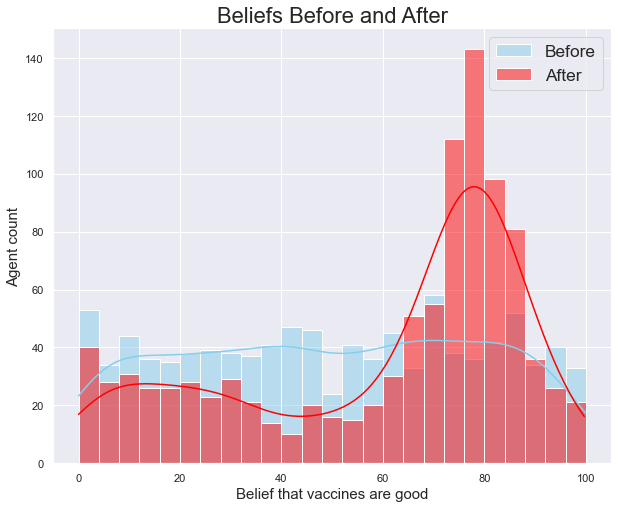

In [11]:
# 1 Histogram
sns.set(style="darkgrid", rc={'figure.figsize':(10, 8)})

sns.histplot(data=before, color="skyblue", label="Before", kde=True, bins=25, binrange=(0,100))
sns.histplot(data=after, color="red", label="After", kde=True, bins=25, binrange=(0,100))

plt.legend(fontsize='x-large')
plt.xlabel("Belief that vaccines are good", fontsize=15)
plt.ylabel("Agent count", fontsize=15)
plt.title("Beliefs Before and After", fontsize=22)
plt.show()

In [12]:
# Subplots
# set size of overall plot
n_rows, n_cols = 3, 3


# Specify which data should be considered (i.e., runs from which policy)
policy_names = data.columns
policy = '0%,\n–'
# policy = '0%,\nR'
# policy = '10%,\n–'
# policy = '10%,\nR'
# policy = '25%,\n–'
# policy = '25%,\nR'

policy_data = data[[policy]]
policy_data.head()

# Sample a run for each subplot
n_runs = len(policy_data)
# run_ids = random.choices(range(n_runs), k=n_rows*n_cols)
run_ids = random.sample(range(n_runs), k=n_rows*n_cols)
print(run_ids) # TODO: avoid that random.choices returns the same thing multiple times

# Convert & Join data
subplot_data = {}
for run_id in run_ids:  # data.iloc[:,policy_nr]
    run_data = policy_data.iloc[run_id,0]
    before, after = convert(run_data)
    subplot_data[run_id] = (before, after)

print(subplot_data)

[33, 47, 34, 5, 15, 43, 36, 48, 1]
{33: ([73.0, 99.0, 85.0, 9.0, 92.0, 66.0, 78.0, 96.0, 53.0, 51.0, 37.0, 78.0, 38.0, 51.0, 88.0, 42.0, 99.0, 13.0, 72.0, 19.0, 63.0, 68.0, 9.0, 82.0, 17.0, 87.0, 13.0, 21.0, 4.0, 80.0, 15.0, 92.0, 17.0, 14.0, 70.0, 58.0, 75.0, 53.0, 18.0, 1.0, 15.0, 57.0, 38.0, 49.0, 6.0, 11.0, 34.0, 71.0, 80.0, 6.0, 80.0, 88.0, 96.0, 56.0, 42.0, 95.0, 61.0, 41.0, 38.0, 25.0, 64.0, 2.0, 77.0, 55.0, 7.0, 65.0, 35.0, 100.0, 59.0, 77.0, 58.0, 15.0, 92.0, 77.0, 99.0, 77.0, 38.0, 47.0, 73.0, 42.0, 26.0, 64.0, 47.0, 45.0, 12.0, 72.0, 26.0, 50.0, 2.0, 60.0, 8.0, 80.0, 17.0, 24.0, 91.0, 99.0, 23.0, 55.0, 76.0, 42.0, 8.0, 4.0, 39.0, 18.0, 77.0, 90.0, 56.0, 49.0, 11.0, 20.0, 32.0, 37.0, 49.0, 38.0, 39.0, 70.0, 35.0, 79.0, 81.0, 58.0, 11.0, 22.0, 50.0, 4.0, 30.0, 4.0, 79.0, 68.0, 43.0, 15.0, 36.0, 41.0, 51.0, 33.0, 36.0, 20.0, 66.0, 49.0, 65.0, 48.0, 53.0, 3.0, 100.0, 53.0, 27.0, 37.0, 58.0, 14.0, 50.0, 83.0, 93.0, 72.0, 52.0, 47.0, 50.0, 14.0, 62.0, 25.0, 34.0, 61.0, 27.0, 45.0,

[33, 47, 34, 5, 15, 43, 36, 48, 1]


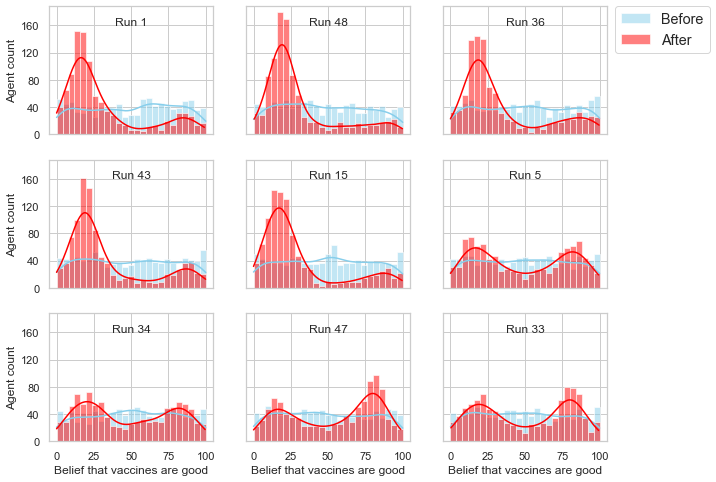

In [13]:
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator

# Subplots
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, sharex="all", sharey="all", figsize=(10, 8))
xticks = 5
yticks = 5

ids = list(subplot_data.keys())
print(ids)

for row in range(n_rows):
    for col in range(n_cols):

        # Plot 1 hist (incl. before & after)
        id = ids.pop()
        data = subplot_data[id]
        before, after = data
        sns.histplot(data=before, color="skyblue", label="Before", kde=True, bins=25, binrange=(0,100), ax=axes[row, col])
        sns.histplot(data=after, color="red", label="After", kde=True, bins=25, binrange=(0,100), ax=axes[row, col])


        if row == 0 & col == 1:
            axes[row, col].title("Beliefs Before and After", fontsize=22)

        # Show replication number
        anc = AnchoredText(f'Run {id}', loc="upper center", frameon=False)
        axes[row, col].add_artist(anc)

        if col == 0:
            axes[row, col].set_ylabel("Agent count")
            axes[row, col].yaxis.set_major_locator(MaxNLocator(yticks))
        if row == n_rows-1:
            axes[row, col].set_xlabel("Belief that vaccines are good")
            axes[row, col].xaxis.set_major_locator(MaxNLocator(xticks))

        if row == 0 and col == n_cols-1:
            axes[row, col].legend(fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


def create_title(policy):
    interventions = policy.split(",\n")
    media_lit = interventions[0] + " Media Literacy intervention,\n"

    if interventions[1] == "R":
        ranking = "Ranking Intervention"
    else:
        ranking = "Conventional Ranking"

    title = media_lit + ranking
    return title


# plt.suptitle(f"Policy:\n {create_title(policy)}", fontsize='x-large')
plt.show()


In [17]:
# Save figure
directory = os.getcwd()
root_directory = os.path.dirname(directory)
visualization_folder = root_directory + '/results/images/'
fig.savefig(visualization_folder + "belief_distributions.png", dpi=800, bbox_inches="tight", pad_inches=0.1)


